In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/cardata.csv")

In [ ]:
df.head()

,Car_code,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,75.0,2014,3.35,5.59,27000,1,3,2,0
1,55.0,2013,4.75,9.54,43000,2,3,2,0
2,65.0,2017,7.25,9.85,6900,1,3,2,0
3,50.0,2011,2.85,4.15,5200,1,3,2,0
4,65.0,2014,4.60,6.87,42450,2,3,2,0


In [ ]:
df.tail()

,Car_code,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,45.0,2016,9.50,11.6,33988,2,3,2,0
297,45.0,2015,4.00,5.9,60000,1,3,2,0
298,50.0,2009,3.35,11.0,87934,1,3,2,0
299,45.0,2017,11.50,12.5,9000,2,3,2,0
300,50.0,2016,5.30,5.9,5464,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_code       301 non-null    float64
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 21.3 KB


In [ ]:
df.isnull().sum()

Car_code         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9cc0602710>,
      dtype=object)

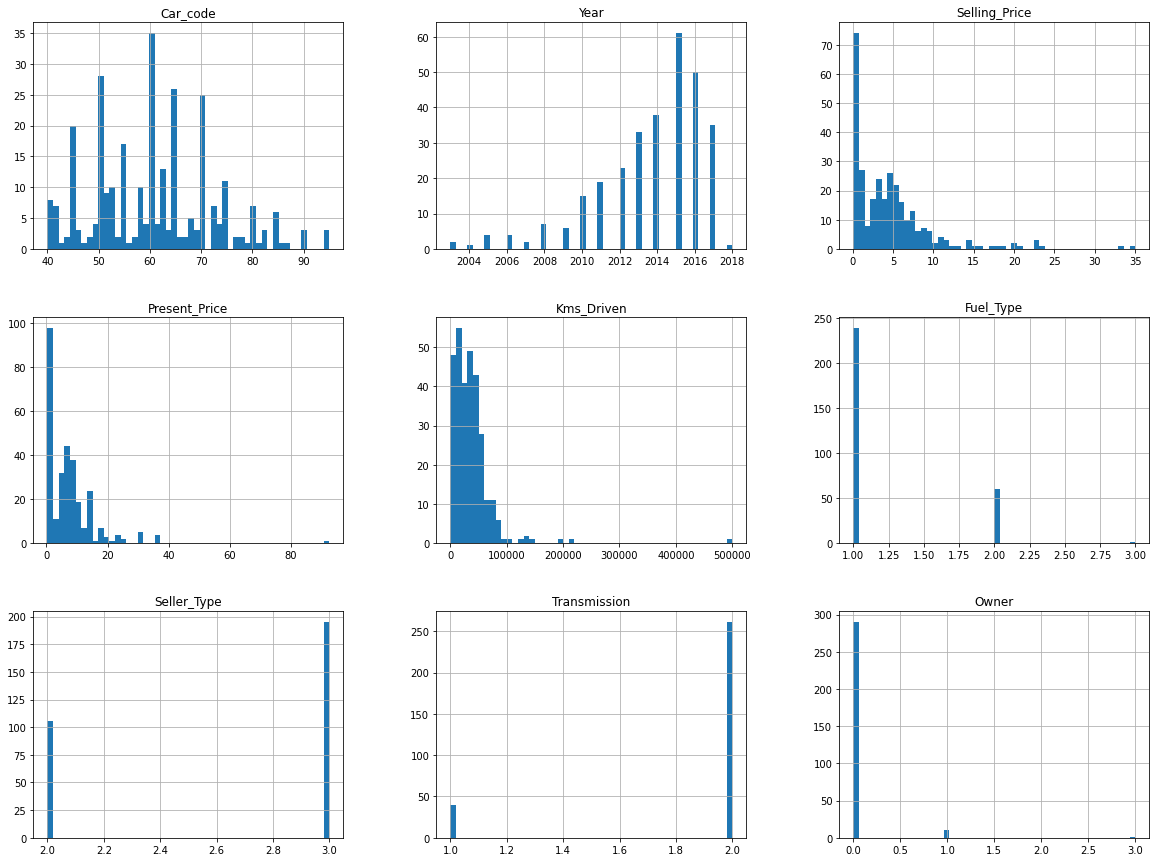

In [ ]:
df.hist(bins=50,figsize=(20,15))

# Train Test Split

In [ ]:
X = df.drop(['Selling_Price'],axis=1)

In [ ]:
X

,Car_code,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,75.0,2014,5.59,27000,1,3,2,0
1,55.0,2013,9.54,43000,2,3,2,0
2,65.0,2017,9.85,6900,1,3,2,0
3,50.0,2011,4.15,5200,1,3,2,0
4,65.0,2014,6.87,42450,2,3,2,0
...,...,...,...,...,...,...,...,...
296,45.0,2016,11.60,33988,2,3,2,0
297,45.0,2015,5.90,60000,1,3,2,0
298,50.0,2009,11.00,87934,1,3,2,0
299,45.0,2017,12.50,9000,2,3,2,0


In [ ]:
Y = df['Selling_Price']

In [ ]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[ 1.19922434,  0.128897  , -0.23621461, ...,  0.73728539,
         0.39148015, -0.17450057],
       [-0.48334208, -0.21751369,  0.22150462, ...,  0.73728539,
         0.39148015, -0.17450057],
       [ 0.35794113,  1.16812909,  0.25742689, ...,  0.73728539,
         0.39148015, -0.17450057],
       ...,
       [-0.90398368, -1.60315648,  0.39068691, ...,  0.73728539,
         0.39148015, -0.17450057],
       [-1.32462529,  1.16812909,  0.56450434, ...,  0.73728539,
         0.39148015, -0.17450057],
       [-0.90398368,  0.8217184 , -0.20029235, ...,  0.73728539,
         0.39148015, -0.17450057]])

In [ ]:
from sklearn.model_selection import train_test_split

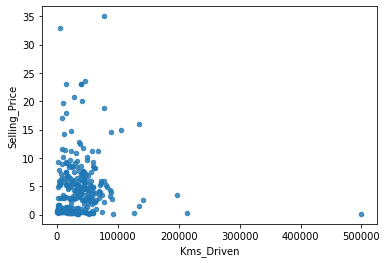

In [ ]:
df.plot(kind="scatter", x="Kms_Driven", y="Selling_Price", alpha=0.8)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=5)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,Y_train)

LinearRegression()

In [ ]:
lm.coef_

array([-0.10605931,  0.98835866,  3.92112832, -0.65792883,  0.66113572,
        0.5719961 , -0.3293921 , -0.21472889])

In [ ]:
lm.score(X_test,Y_test)

0.8670563203700677

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
predictions

array([10.28444619, 10.51686774,  4.54577855,  5.76717428,  2.47733284,
        8.9231372 ,  7.45777307,  1.52417236, 15.81707447,  4.83234173,
        6.24831117,  6.62383231,  3.66652749,  3.17077945, -0.59004133,
        4.18545382,  9.26459325, -0.42259684,  9.48315126,  1.26628261,
        7.5177526 , 18.01219283, 19.50133244,  0.25367035,  2.03604165,
        4.78321267,  5.15613001,  6.80366707,  5.14242515,  5.54908139,
        4.44563224,  7.97722586,  5.88188694, -0.72117925,  0.68691621,
        6.63508375,  7.53204085,  5.45002397,  0.91359426,  1.1811557 ,
        2.24055473,  5.38804562, 14.40412588, -8.47124656,  1.44774085,
        3.97574101, -1.03655105,  8.13118071,  4.31026786,  4.93457202,
        5.00358565, 16.14239211,  0.72271875,  1.46152681,  1.57402638,
       -1.42348495,  2.63649699,  0.78058182, -1.69403329,  1.66363431,
        0.83553022])